<a href="https://colab.research.google.com/github/anastasiia-vsk/Start-into-ML/blob/main/%D0%92%D0%B0%D1%81%D1%8C%D0%BA%D0%BE_%D0%9F%D0%A09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9.

# Згорткові нейронні мережі

### Завдання 1. Створити нейронну мережу (модель) з використанням згорткових шарів для датасета cifar 10 (mnist, fasion mnist).

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np

1. Завантажити датасет, вивести перші 10 зображень.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


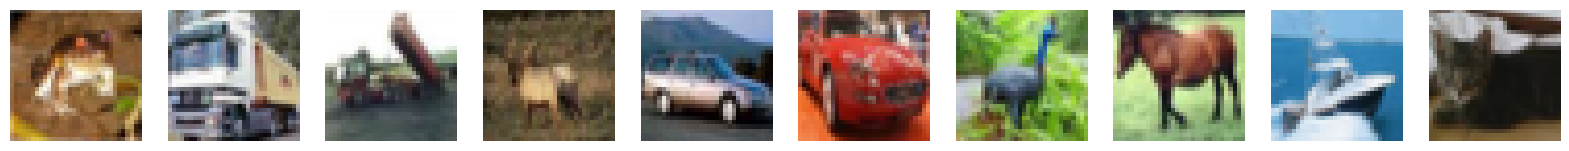

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()

2. Підготувати дані.

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (50000, 32, 32, 3)
y_train: (50000, 10)
X_test: (10000, 32, 32, 3)
y_test: (10000, 10)


3. Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість епох).


In [4]:
model = models.Sequential()

# Перший згортковий блок
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Другий згортковий блок
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Третій згортковий блок
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))  # Третій згортковий шар
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Плоский шар та Dense шари
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Dense шар
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # Вихідний шар

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. вивести summary.

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

4. При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості
навчання).


In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [7]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2643 - loss: 2.1264 - val_accuracy: 0.4255 - val_loss: 1.7150 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4478 - loss: 1.5420 - val_accuracy: 0.5533 - val_loss: 1.2941 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5242 - loss: 1.3350 - val_accuracy: 0.5072 - val_loss: 1.5079 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5782 - loss: 1.1985 - val_accuracy: 0.6623 - val_loss: 0.9625 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6089 - loss: 1.1163 - val_accuracy: 0.6500 - val_loss: 1.0221 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6357 - loss: 1.0479 - val_accuracy: 0.7010 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6573 - loss: 

6. Побудувати графіки функції втрат і точності.

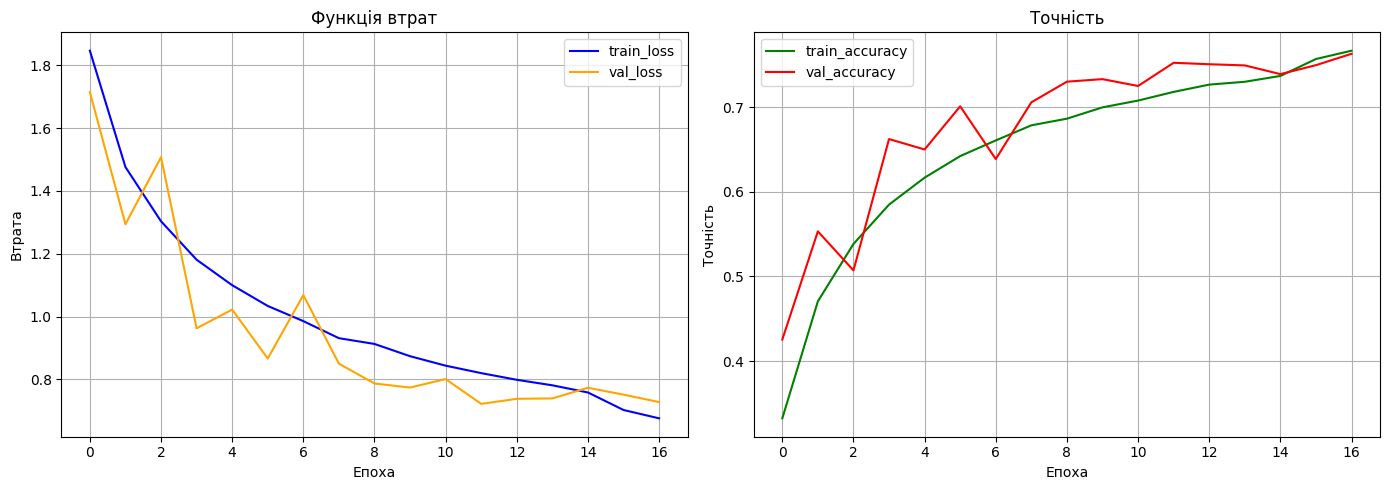

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['loss'], label='train_loss', color='blue')
axs[0].plot(history.history['val_loss'], label='val_loss', color='orange')
axs[0].set_title('Функція втрат')
axs[0].set_xlabel('Епоха')
axs[0].set_ylabel('Втрата')
axs[0].legend()
axs[0].grid()

axs[1].plot(history.history['accuracy'], label='train_accuracy', color='green')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy', color='red')
axs[1].set_title('Точність')
axs[1].set_xlabel('Епоха')
axs[1].set_ylabel('Точність')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

7. Класифікаційний звіт.

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

    airplane       0.79      0.78      0.79      1000
  automobile       0.87      0.88      0.88      1000
        bird       0.72      0.57      0.64      1000
         cat       0.53      0.59      0.56      1000
        deer       0.69      0.71      0.70      1000
         dog       0.66      0.63      0.64      1000
        frog       0.76      0.84      0.80      1000
       horse       0.80      0.81      0.80      1000
        ship       0.84      0.88      0.86      1000
       truck       0.87      0.83      0.85      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



8. візуалізацію розпізнавання.

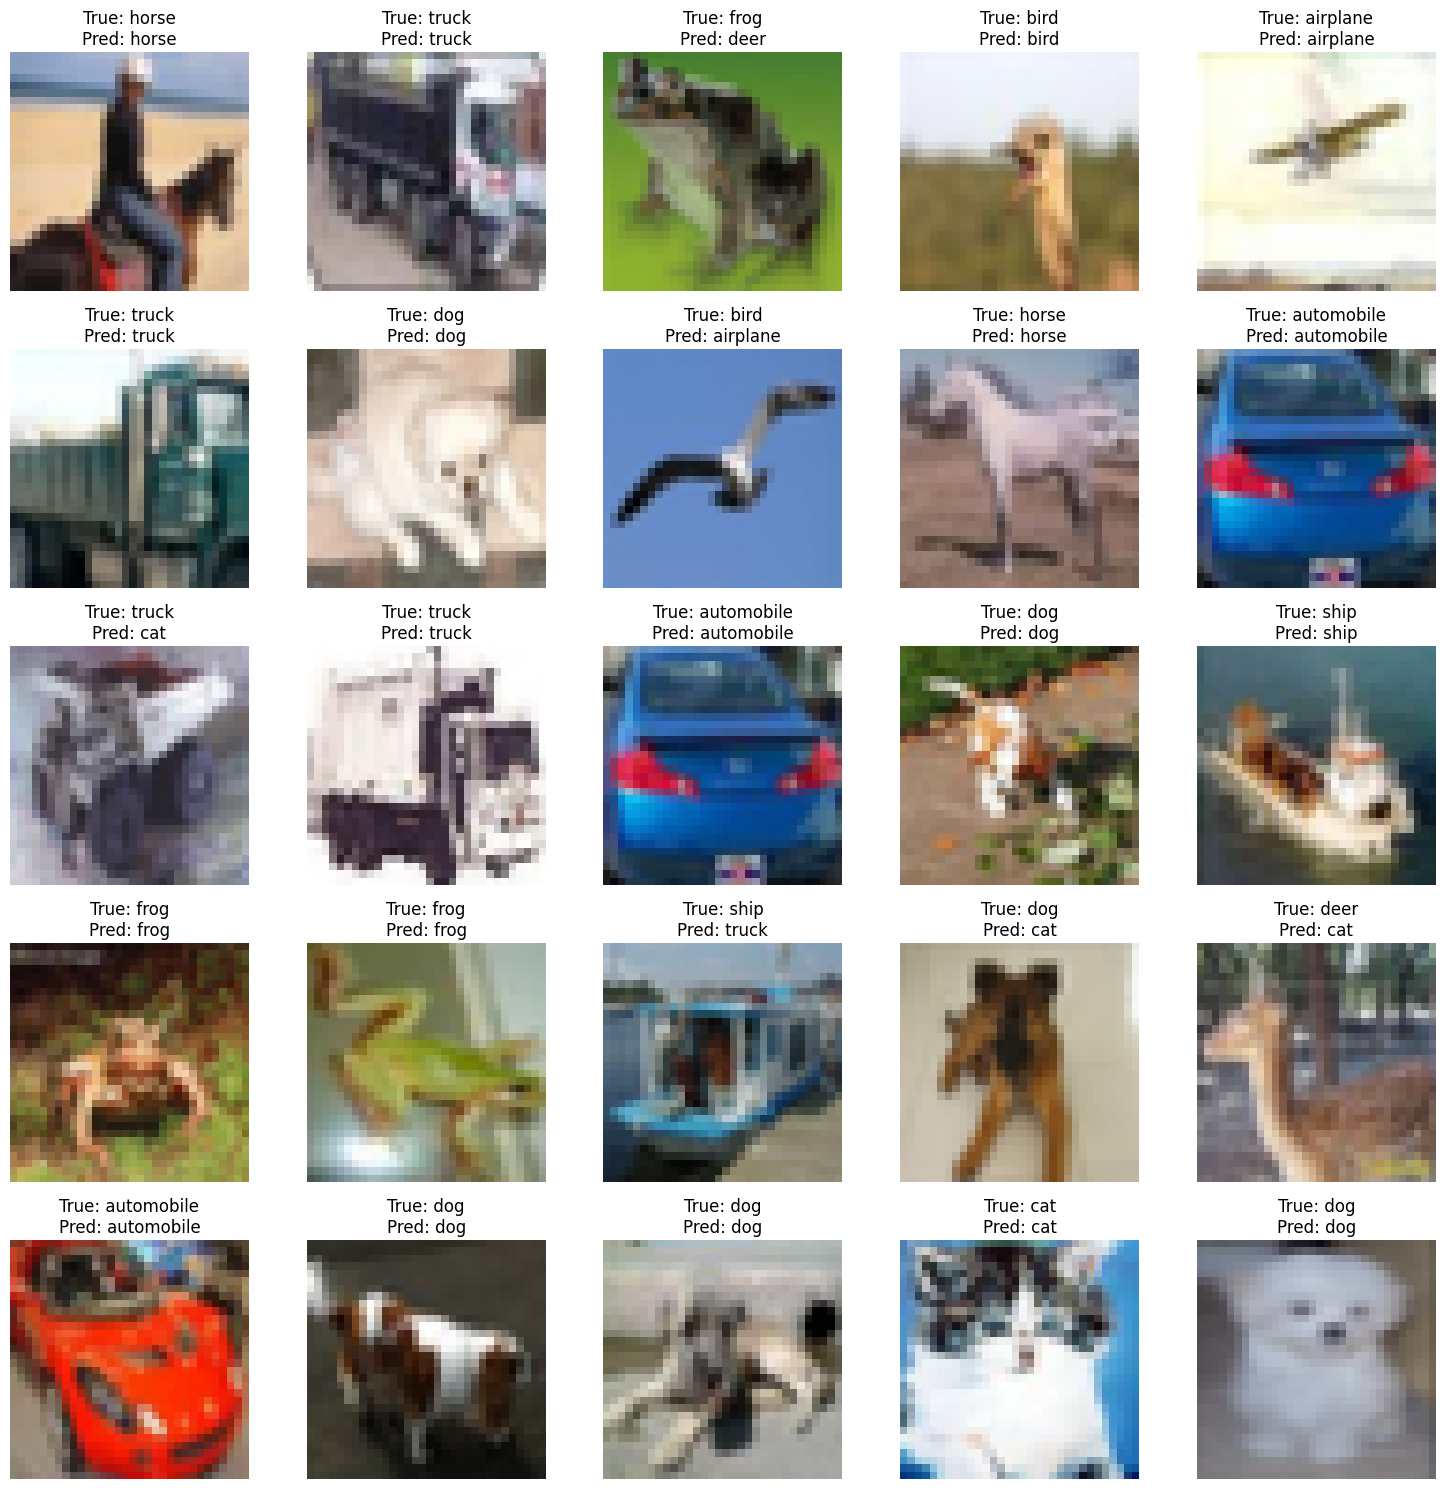

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx])
    true_label = class_names[np.argmax(y_test[idx])]
    predicted_label = class_names[y_pred_classes[idx]]
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Завданння 2.
1. Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари).
3. Повторити всі кроки як і для попереднього завдання.

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Нормалізуємо дані
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

# Змінюємо розмір зображень по одному
X_train_resized = np.array([tf.image.resize(image, (224, 224)).numpy() for image in X_train])
X_test_resized = np.array([tf.image.resize(image, (224, 224)).numpy() for image in X_test])

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

In [ ]:
history = model.fit(X_train,
                    epochs=100,
                    validation_data=X_test,
                    callbacks=[early_stop, reduce_lr])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['loss'], label='train_loss', color='blue')
axs[0].plot(history.history['val_loss'], label='val_loss', color='orange')
axs[0].set_title('Функція втрат')
axs[0].set_xlabel('Епоха')
axs[0].set_ylabel('Втрата')
axs[0].legend()
axs[0].grid()

axs[1].plot(history.history['accuracy'], label='train_accuracy', color='green')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy', color='red')
axs[1].set_title('Точність')
axs[1].set_xlabel('Епоха')
axs[1].set_ylabel('Точність')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

report = classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(report)

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx])
    true_label = class_names[np.argmax(y_test[idx])]
    predicted_label = class_names[y_pred_classes[idx]]
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Висновки

Модель показує загальну точність 75%, з найвищими результатами для класів "автомобіль" і "вантажівка", які мають precision і recall близько 0.87-0.88. Середні показники f1-score для більшості класів становлять приблизно 0.75, але клас "птах" має найнижчі показники з recall 0.57, що свідчить про труднощі в його розпізнаванні.

Для покращення результатів рекомендується провести балансування класів, а також використовувати аугментацію даних для класів з низькими показниками. Розгляньте можливість використання складніших архітектур нейронних мереж для підвищення точності класифікації.